# Fourier Transform

References:
* [3Blue1Brown](https://www.youtube.com/embed/spUNpyF58BY)
* [Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)
* [The Fast Fourier Transform](https://www.youtube.com/watch?v=h7apO7q16V0&ab_channel=Reducible)
* [Understanding the FFT algorithm](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)
* [Original Cooley-Tukey FFT paper](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf)
* [FFTPACK implementation](http://www.netlib.org/fftpack/fft.c)


In [1]:
from IPython.display import IFrame
#HTML('<iframe width="950" height="520" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="1" allowfullscreen></iframe>')
IFrame(src="https://www.youtube.com/embed/spUNpyF58BY", width=950, height=520)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
dx = 0.01
x = np.arange(0,2. + dx,dx)

In [4]:
y = np.exp(-1j * 2*np.pi*3*x)
cw = np.cos(2*np.pi*3*x)
f = cw*y

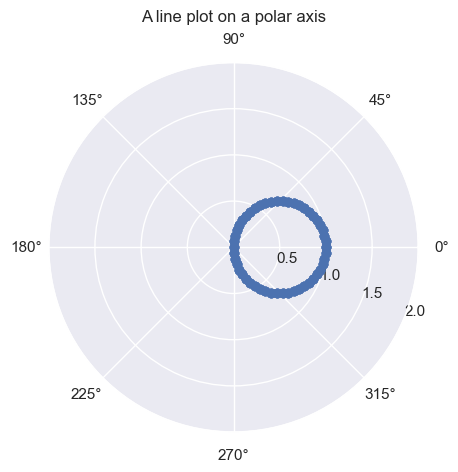

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.angle(f), np.abs(f))
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [6]:
np.exp(-1j * 2*np.pi*10*x)
cw = np.cos(2*np.pi*1*x)
f = cw*y

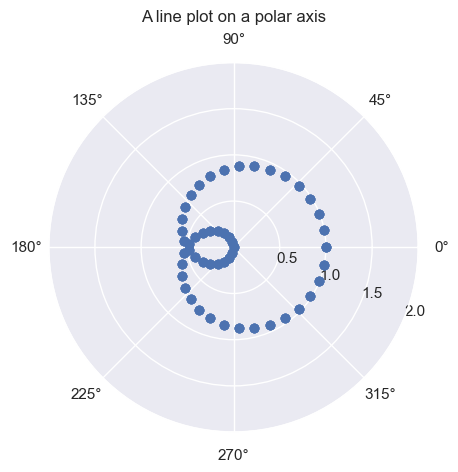

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.angle(f), np.abs(f))
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [8]:
N = 4
n = np.arange(N)
n.reshape((1,N))
k = n.reshape((N, 1))
print(n.shape)
print(k.shape)

(4,)
(4, 1)


In [9]:
n.dot(k).shape

(1,)

In [10]:
(n*k).shape # tensor product

(4, 4)

# DFT

## Scratch

In [11]:
xt = 1000
xmin = 0.
xmax = 2.
x = np.linspace(xmin,xmax,xt)
minfreq = 2
maxfreq = 20
fun = np.cos(2*np.pi*3*x) + 2*np.cos(2*np.pi*5*x)
numfreq = 10*(maxfreq - minfreq)

In [12]:
import numba
#using num frequencies different from num time samples
@numba.jit(nopython=True)
def ft(f: np.ndarray) -> np.ndarray:
    ff = np.zeros(shape=numfreq, dtype=np.csingle)
    n = np.linspace(minfreq, maxfreq, numfreq)
    N = len(f)
    k = np.arange(N) * (xmax - xmin) #same range as function
    for i in range(len(n)):
        ff[i] = np.sum(f*np.exp(-1j * 2 * np.pi * n[i] * k / N))
    return ff

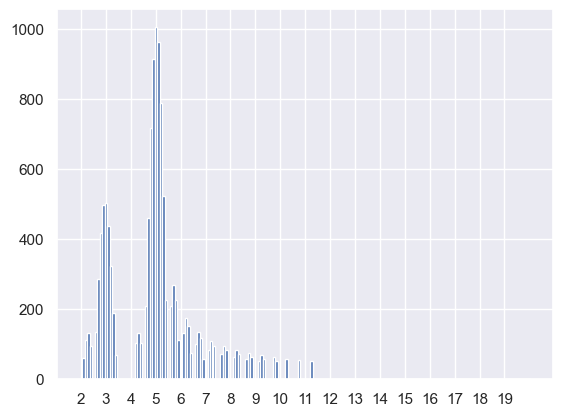

In [13]:
y = np.abs(ft(fun))
m = np.max(y)
cutoff = 0.05 * m
p = np.vectorize(lambda x: x if x >= cutoff else 0)(y)
plt.xticks(np.arange(minfreq, maxfreq, 1.0))
plt.bar(np.linspace(minfreq,maxfreq,numfreq), p, align="center", width=0.1)
#plt.plot(np.linspace(minfreq,maxfreq,numfreq), p)
plt.show()

## DFT

\begin{equation}
    X_k = \sum_{n=0}^{N-1} f_n e^{-i 2\pi kn/N } = \sum_{n=0}^{N-1} f_n[cos(2\pi kn/N) - i * sin(2\pi kn/N)], \quad k = 0, \ldots, N-1.
\end{equation}

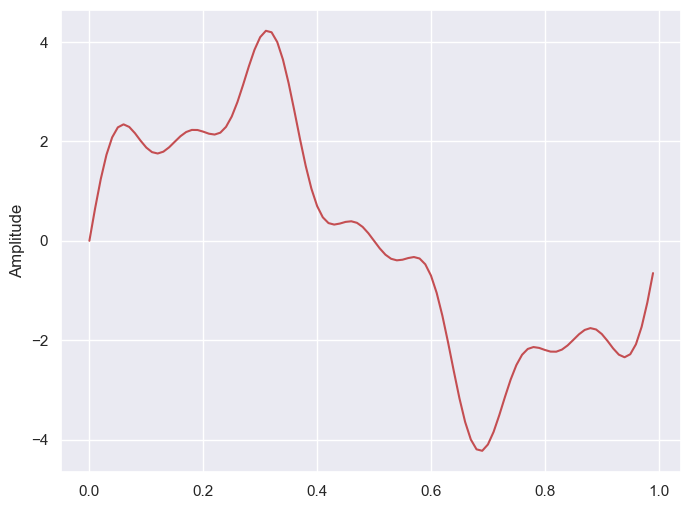

In [14]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [15]:
def DFT(x: np.ndarray) -> np.ndarray:
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N) # tensor product of all k x all n
    
    X = np.dot(e, x)
    
    return X

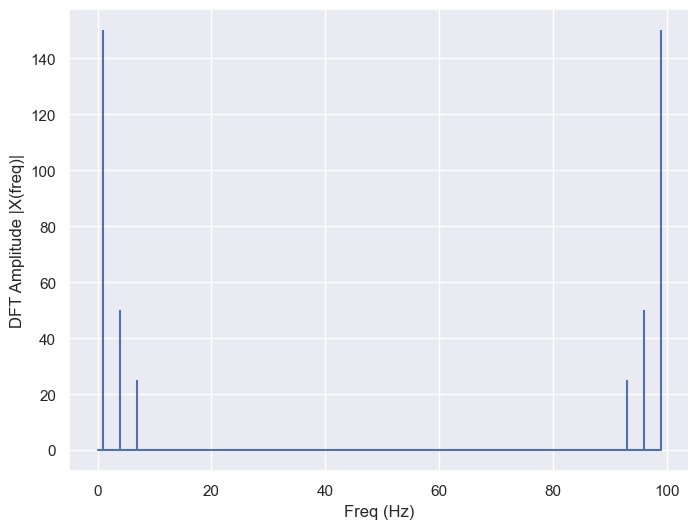

In [16]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


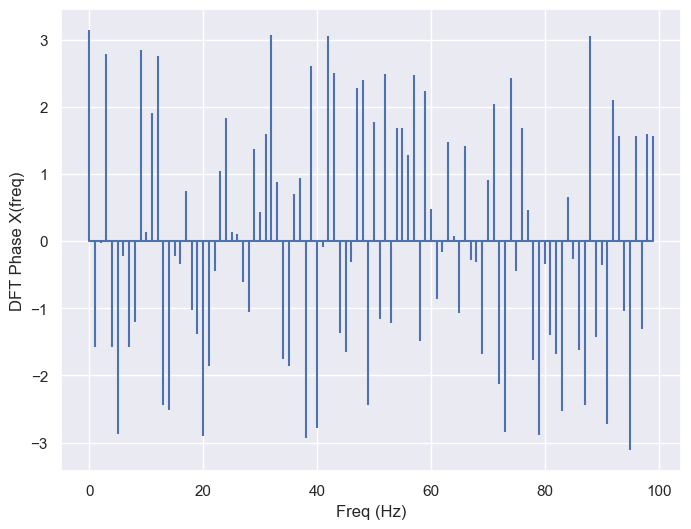

In [17]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, np.angle(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Phase X(freq)')
plt.show()


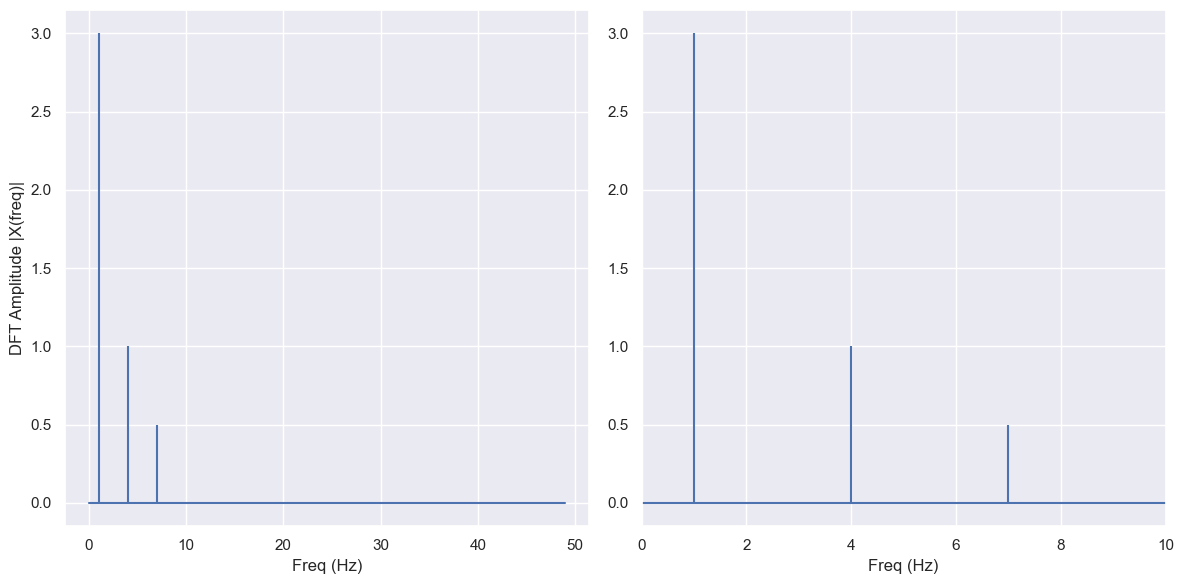

In [18]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


## Inverse DFT

\begin{equation}
    X_k =  \frac{1}{N} \sum_{n=0}^{N-1} f_n e^{i 2\pi kn/N } = \frac{1}{N} \sum_{n=0}^{N-1} f_n[cos(2\pi kn/N) + i * sin(2\pi kn/N)], \quad k = 0, \ldots, N-1.
\end{equation}

In [19]:
def IDFT(x: np.ndarray) -> np.ndarray:
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N) / N # tensor product of all k x all n
    
    X = np.dot(e, x)
    
    return X

In [20]:
X = IDFT(DFT(x))

In [21]:
(np.abs(X-x)**2).mean()

4.928312116736428e-27

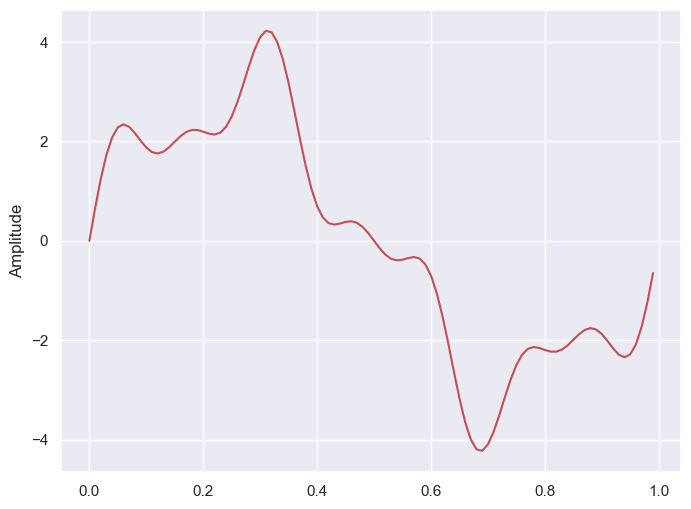

In [22]:
X = IDFT(DFT(x))

plt.figure(figsize = (8, 6))
plt.plot(t, np.real(X), 'r')
plt.ylabel('Amplitude')

plt.show()

# FFT

In [23]:
sr = 4
t = np.arange(0,1,ts)
N = sr
f = 2*np.cos(2*np.pi*t) + 3*np.cos(2*np.pi*4*t) + 7*np.cos(2*np.pi*9*t)

In [24]:
n = np.arange(N)
k = n.reshape((N, 1))
e = np.exp(-2j * np.pi * k * n / N) # tensor product of all k x all n

In [25]:
e

array([[ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
         1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17-1.0000000e+00j,
        -1.0000000e+00-1.2246468e-16j, -1.8369702e-16+1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j, -1.0000000e+00-1.2246468e-16j,
         1.0000000e+00+2.4492936e-16j, -1.0000000e+00-3.6739404e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.8369702e-16+1.0000000e+00j,
        -1.0000000e+00-3.6739404e-16j,  5.5109106e-16-1.0000000e+00j]])

In [26]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 8:  # this cutoff should be optimized
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

In [27]:
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

True

In [28]:
%timeit DFT(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

25.2 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.29 ms ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.94 µs ± 64.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [29]:
def FFT_vectorized(x: np.ndarray) -> np.ndarray:
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=np.float64)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 4)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])
    return X.ravel()

In [30]:
x = np.random.random(8192)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

True

In [31]:
%timeit FFT(x)
%timeit FFT_vectorized(x)
%timeit ft(x)
%timeit np.fft.fft(x)

10.9 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
534 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
17 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
57 µs ± 962 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [163]:
import numba
import numpy.typing as npt
@numba.jit(nopython=True)
def bitreverse(num: int, log2n: int) -> int:
    reverse_num = 0
    for i in range(log2n):
        if (num & (1 << i)):
            reverse_num |= 1 << ((log2n - 1) - i)
    return reverse_num
 
# Iterative FFT function to compute the DFT
# of the given coefficient vector

@numba.jit(nopython=True)
def setelements(x: npt.NDArray[np.float64], A: npt.NDArray[np.cdouble], log2n: int):
    for i in range(len(x)):
        A[bitreverse(i, log2n)] = x[i]

@numba.jit(nopython=True)
def FFT_iterative(a: npt.NDArray[np.float64]) -> npt.NDArray[np.cdouble]:
    n = len(a)
    A = np.empty(n, dtype=np.cdouble)
    log2n = int(np.log2(n))
    # bit reversal of the given array
    #for i in range(n):
    #    rev = bitreverse(i, log2n)
    #  #rev = reverseBits(i)
    #   A[rev] = a[i] + 0.j
    setelements(a, A, log2n)
    for s in range(1, log2n + 1):
        m = 1 << s  # 2 power s
        m2 = m >> 1  # m2 = m/2 -1
        w = 1.0 + 0j
 
        # principle root of nth complex
        # root of unity.
        wm = np.exp(-1j * np.pi / m2)
        for j in range(m2):
            for k in range(j, n, m):
 
                # t = twiddle factor
                t = w * A[k + m2]
                u = A[k]
 
                # similar calculating y[k]
                A[k] = u + t
 
                # similar calculating y[k+n/2]b
                A[k + m2] = u - t
            w *= wm
    return A

In [164]:
x = np.random.random(65536)
np.allclose(FFT_iterative(x), np.fft.fft(x))
#np.max(np.abs(FFT_iterative(x)) - np.abs(np.fft.fft(x)))

True

In [165]:
%timeit FFT_iterative(x)
%timeit np.fft.fft(x)

3 ms ± 6.25 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
550 µs ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [35]:
import codon

In [36]:
@codon.jit
def fib(n):
    return 1 if n < 2 else fib(n-1) + fib(n-2)

In [37]:
fib(4)

5

In [38]:
def reverse_bits(x):
    

SyntaxError: incomplete input (3423975923.py, line 2)

In [ ]:
size(3)

In [41]:
import numpy.typing as npt
@numba.jit(nopython = True)
def mydft(x : npt.NDArray[np.float64]) -> npt.NDArray[np.cdouble]:
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    # Numba does not like dot!
    #e : npt.NDArray[np.cdouble] = np.exp(-2j * np.pi * k * n / N) # tensor product of all k x all n
    #X : npt.NDArray[np.cdouble] = np.dot(e, x)
    X = np.empty(N, dtype=np.cdouble)
    for j in range(N):
        X[j] = np.sum(x * np.exp(-2j * np.pi * j * np.arange(N)/N))
    return X

In [42]:
import numpy.typing as npt
@numba.jit(nopython=True)
def myfft(x: npt.NDArray[np.float64]) -> npt.NDArray[np.cdouble]:
    #if len(x) == 1:
    #    return np.array([x[0] + 0j])
    if len(x) < 8:
        return mydft(x)
    even = myfft(x[::2])
    odd = myfft(x[1::2])
    #w = np.exp(-2j*np.pi/len(x))
    y = np.empty(len(x), dtype=np.cdouble)
    factor = np.exp(-2j*np.pi*np.arange(len(x)//2)/len(x))
    y[:len(x) // 2] = even + factor * odd
    y[len(x) // 2:] = even - factor * odd
    #for j in range(len(x)//2):
    #    y[j] = even[j] + (w**j) * odd[j]
    #    y[j + len(x) // 2] = even[j] - (w**j)*odd[j]
    return y
    


In [43]:
x = np.random.random(8192)
#np.max(np.abs(myfft(x) - np.fft.fft(x)))
np.allclose(myfft(x),np.fft.fft(x))

True

In [ ]:
%timeit myfft(x)
%timeit np.fft.fft(x)

In [64]:
import numpy.typing as npt

@numba.jit(nopython=True)
def bitreverse(d: int, log2n: int) -> int:
    n = 0
    for _ in range(log2n):
        n <<= 1
        n |= (d & n)
        d >>= 1
    return n

@numba.jit(nopython=True)
def myfft_iter(x: npt.NDArray[np.float64]) -> npt.NDArray[np.cdouble]:
    n = len(x)
    log2n = int(np.log2(n))
    y = np.zeros(n, np.cdouble)
    for k in range(n):
        y[bitreverse(k, log2n)] = x[k]
    for s in range(1, log2n + 1):
        m = 1 << s # m = 2^s
        for k in range(0, n, m):
            for j in range(k, m//2):
                w = np.exp(-2j * bitreverse(k, log2n) * np.pi / m)
                t = w * y[j + m//2]
                u = y[j]
 
                y[j] = (u + t)
 
                y[j + m//2] = (u - t)
    return y
    

In [65]:
x = np.random.random(8192)
np.allclose(myfft_iter(x),np.fft.fft(x))
np.max(np.abs(myfft_iter(x) - np.fft.fft(x)))

4083.8854758470916

In [ ]:
%timeit myfft_iter(x)
%timeit np.fft.fft(x)

In [ ]:
x = np.random.random(8192)
np.allclose(iterative_fft(x),np.fft.fft(x))
np.max(np.abs(iterative_fft(x) - np.fft.fft(x)))

In [ ]:
for i in range(1,10):
    print(i)

```cpp
void iterativeFFT(const vector<complex<double> >& primal,
                  vector<complex<double> >& dual,
                  const int P) {
  const int N = primal.size();
  const bool inverse = P < 0;
  
  const int absP = inverse ? -P : P;

  // bottom level of iteration tree
  for (int i = 0; i < N; i++)
    dual[i] = primal[reverseBits(i) >> (32 - absP)];

  // there are absP levels above the bottom
  for (int p = 1; p <= absP; p++) {
    // complex root of unity
    const int unityStep = 0x1 << p;
    const double theta = (inverse ? -1 : 1) * 2 * M_PI / unityStep; // INVERSE
    const complex<double> unityRoot(cos(theta), sin(theta));

    // each higher level doubles the step size
    for (int offset = 0; offset < N; offset += unityStep) {
      complex<double> omega = 1;

      // combine within a step segment (note only iterate over half step)
      for (int k = 0; k < unityStep/2; k++) {
        const complex<double> u = dual[offset + k];

        const complex<double> t = omega * dual[offset + k + unityStep/2];
        omega *= unityRoot;

        dual[offset + k] = u + t;
        dual[offset + k + unityStep/2] = u - t;
      }
    }
  }

  if (inverse) // INVERSE
    for (int j = 0; j < N; j++)
      dual[j] /= N;
}
```

In [124]:
import numpy.typing as npt
import numpy as np
#@numba.jit(nopython=True)
def bitreverse(num: int, NO_OF_BITS: int) -> int:
    reverse_num = 0
    for i in range(NO_OF_BITS):
        if (num & (1 << i)):
            reverse_num |= 1 << ((NO_OF_BITS - 1) - i)
    return reverse_num

#@numba.jit(nopython=True)
def itfft(x: npt.NDArray[np.float64]) -> npt.NDArray[np.cdouble]:
    N = len(x)
    log2n = int(np.log2(N))
    dual = np.zeros(N, np.cdouble)
    for k in range(N):
        dual[k] = x[bitreverse(k, log2n)] + 0j
    absP = log2n
    for p in range(1, absP + 1):
        unity_step = 0x1 << p
        theta =  -np.pi / unity_step
        unity_root = complex(np.cos(theta), np.sin(theta))
        for offset in range(0, N, unity_step):
            omega = 1. + 0j
            for k in range(offset, unity_step // 2):
                u = dual[k]
                t = omega * dual[k + unity_step // 2]
                dual[k] = u + t
                dual[k + unity_step//2] = u - t
        omega *= unity_root
    return dual
    

In [125]:
x = np.arange(0.,1.,1./128)
f = np.cos(2*np.pi*2*x)
np.allclose(itfft(f),np.fft.fft(f))
np.max(np.abs(itfft(f) - np.fft.fft(f)))

64.60695632077326

In [126]:
%timeit itfft(x)
%timeit np.fft.fft(x)

201 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.38 µs ± 7.13 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


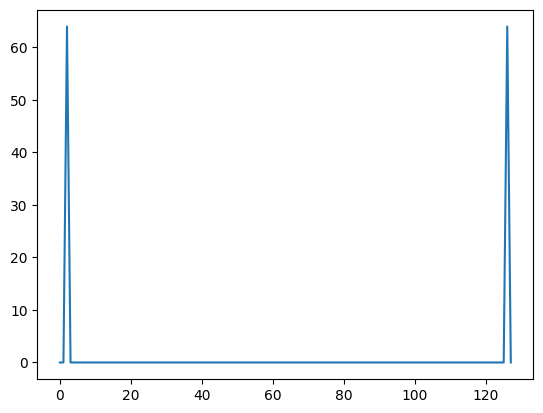

In [130]:
import matplotlib.pyplot as plt
plt.plot(np.abs(FFT_iterative(f)))
#plt.plot(np.abs(np.fft.fft(f)))

In [42]:
0xb1000

724992

In [55]:
bin(bitreverse(int('0b100',2), 3))

0
2
0


'0b10'

In [56]:
int('0b100', 2)

4